In [2]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util
%matplotlib inline

In [3]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [4]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'TESTING_PATH': os.path.join('Tensorflow', 'workspace','testing'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME)
}

In [5]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [6]:
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-51')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [6]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [26]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'testing', 'org.jpg')

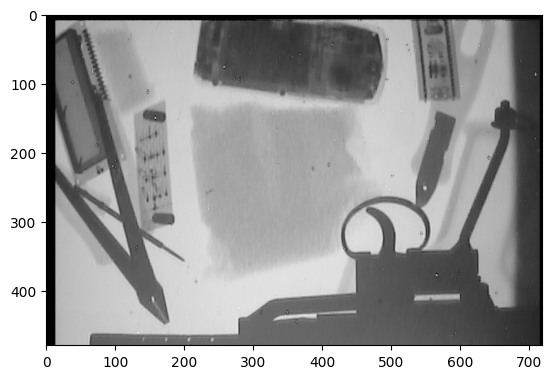

In [27]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections
# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
label_id_offset = 1
image_np_with_detections = image_np.copy()
viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=50,
            min_score_thresh=.2,
            agnostic_mode=False)
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
print(detections['detection_classes'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [1]:
pip list

Package                       Version
----------------------------- -----------
absl-py                       1.3.0
anyio                         3.6.1
apache-beam                   2.41.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asttokens                     2.0.8
astunparse                    1.6.3
attrs                         22.1.0
avro-python3                  1.10.2
backcall                      0.2.0
beautifulsoup4                4.11.1
bleach                        5.0.1
cachetools                    5.2.0
certifi                       2022.9.24
cffi                          1.15.1
charset-normalizer            2.1.1
cloudpickle                   2.2.0
colorama                      0.4.5
contextlib2                   21.6.0
contourpy                     1.0.5
crcmod                        1.7
cycler                        0.11.0
Cython                        0.29.32
debugpy                       1.6.3
decorator                     5.1.1
defused


[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
